In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 불필요한 경고가 뜨지 않게..
import warnings
warnings.filterwarnings('ignore')

# 데이터 전처리 알고리즘 (비지도 학습)
# 문자열 데이터를 숫자로 변환한다.
from sklearn.preprocessing import LabelEncoder
# 표준편차를 기반으로 표준화 한다.
# 잘못된 학습을 정상화 시키는 목적으로 사용한다.
from sklearn.preprocessing import StandardScaler
# 최소값을 0, 최대값1로 하는 표준화
from sklearn.preprocessing import MinMaxScaler

# 데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split
# 교차 검증
from sklearn.model_selection import cross_val_score

# 평가 함수
# 정확도 평가 함수
from sklearn.metrics import accuracy_score
# mse 평가 함수
from sklearn.metrics import mean_squared_error

# 학습 알고리즘 - 분류
# 최 근접 이웃
# 학습시 : 주어진 데이터를 저장만 한다.
# 예측 : 주변의 데이터를 보고 가장 많은 결과로 결정한다.
from sklearn.neighbors import KNeighborsClassifier
# 선형
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 트리
# 학습시 : 주어진 데이터를 가지고 질문들을 생성한다.
# 예측시 : 질문을 통해 최종 결과를 예측한다.
from sklearn.tree import DecisionTreeClassifier
# 앙상블 - 다수의 알고리즘이 던지는 결과를 취합하여 최종 결과를 결정한다.
# 트리들을 사용한다.
# 학습시 - 데이터를 랜덤하게 섞어서 80%를 추출한다.
# 이렇게 추출된 데이터를 트리의 개수만큼 생성하여 각 트리들에게 주고
# 학습을 수행한다.
# 예측시 - 각 트리가 던지는 결과를 취합하여 다수결의 원칙으로 최종 결과를
# 결정한다.
from sklearn.ensemble import RandomForestClassifier
# 부스팅
# 앙상블 알고리즘이 잘못 예측한 데이터를 다시 학습하는 방식
# 학습과 예측 원리를 앙상블과 동일하다.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 학습 알고리즘 - 회귀
# 최 근접 이웃
from sklearn.neighbors import KNeighborsRegressor
# 선형
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
# 트리
from sklearn.tree import DecisionTreeRegressor
# 앙상블
from sklearn.ensemble import RandomForestRegressor
# 부스팅
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 딥러닝
import tensorflow as tf

# 딥러닝 모델의 각 층을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형회귀를 수행하는 은닉층
from tensorflow.keras.layers import Dense
# 활성화 함수를 관리하는 것
from tensorflow.keras.layers import Activation
# CNN 층
from tensorflow.keras.layers import Conv2D
# MaxPooling
from tensorflow.keras.layers import MaxPooling2D
# Dropout
from tensorflow.keras.layers import Dropout
# Flatten
from tensorflow.keras.layers import Flatten

# 조기중단
from tensorflow.keras.callbacks import EarlyStopping
# 성능이 개선되면 모델을 파일로 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint

# 저장한 딥러닝 모델을 불러온다.
from tensorflow.keras.models import load_model

# 원핫 인코딩 하는 함수
from tensorflow.keras.utils import to_categorical

import pickle

import os
import glob
from PIL import Image

In [2]:
# GPU 사용 설정
# 필요한 만큼만 사용하도록 설정한다.
gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면 gpu를 쓴다면 이 코드 무족권 넣어주기
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e : 
        print(e)

In [3]:
# 결과데이터 이름 목록을 가져온다.
with open('image/Caltech_classes.dat', 'rb') as fp :
    categories = pickle.load(fp)
    
categories

['accordion',
 'airplanes',
 'anchor',
 'ant',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai',
 'brain',
 'brontosaurus',
 'buddha',
 'butterfly',
 'camera',
 'cannon',
 'car_side',
 'ceiling_fan',
 'cellphone',
 'chair',
 'chandelier',
 'cougar_body',
 'cougar_face',
 'crab',
 'crayfish',
 'crocodile',
 'crocodile_head',
 'cup',
 'dalmatian',
 'dollar_bill',
 'dolphin',
 'dragonfly',
 'electric_guitar',
 'elephant',
 'emu',
 'euphonium',
 'ewer',
 'Faces',
 'Faces_easy',
 'ferry',
 'flamingo',
 'flamingo_head',
 'garfield',
 'gerenuk',
 'gramophone',
 'grand_piano',
 'hawksbill',
 'headphone',
 'hedgehog',
 'helicopter',
 'ibis',
 'inline_skate',
 'joshua_tree',
 'kangaroo',
 'ketch',
 'lamp',
 'laptop',
 'Leopards',
 'llama',
 'lobster',
 'lotus',
 'mandolin',
 'mayfly',
 'menorah',
 'metronome',
 'minaret',
 'Motorbikes',
 'nautilus',
 'octopus',
 'okapi',
 'pagoda',
 'panda',
 'pigeon',
 'pizza',
 'platypus',
 'pyramid',
 'revolver',
 'rhino',
 'rooster',
 'saxophone',
 'sc

In [4]:
# 이미지의 크기
image_h = 64
image_w = 64

In [5]:
# 저장된 데이터를 불러온다. 아까 튜플로 저장해가지고 튜플 언패킹
X_train, X_test, y_train, y_test = np.load('image/Caltech_obj_101.npy', 
                                          allow_pickle=True)

In [6]:
# 데이터 정규화 (0 ~ 1사이로 맞춘다)
# 색상값은 0 ~ 255까지 이므로 255로 나눠준다.
X_train = X_train.astype('float') / 255
X_test = X_test.astype('float') / 255

print(X_train.shape)
print(X_test.shape)

(6507, 64, 64, 3)
(2170, 64, 64, 3)


### 학습

In [7]:
# 랜덤을 고정한다.
np.random.seed(1)
tf.random.set_seed(1)

In [8]:
# 모델 구축하기
# 지금 작성하는 모델 구조는 ImageNet 이미지 인식 대회에서 우승한 학습모델
model = Sequential()

# CNN - 합성곱 계산 방식을 활용하여 이미지와 배경의 값의 차이를 더 많이 나게 하는 레이어.
#학습시 커널에 어떠한 값이 들어가야하는지 학습
# kernel_size : 커널의 크기 2*2, 3*3 / 커널크기 작게하면 더 엄격하게 한단 말.
# input_shape : 입력층의 구조(이미지의 세로, 가로, 채널)
# padding : same을 준다. CNN층을 통과하면 데이터의 크기가 줄어듦. 줄어든만큼 0으로 채워서 크기 유지
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(64,64,3), padding = 'same'))
model.add(Activation('relu'))
# 커널 내에 가장 큰 값만 추출(배경 버리고 사물데이터만 가져오는 역할 수행)
model.add(MaxPooling2D(pool_size = 4))
# 다음 은닉층의 노드를 off 시키는 역할을 한다.
# overfitting 예방, 꼭 필요한 부분의 노드만 학습시킴
# 0.25 ~ 0.5 사이를 권장. 0이면 모든 노드 다 사용 1이면 모든 노드 off
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = 4))
model.add(Dropout(0.25))

# 딥러닝에서 학습은 선형 회귀 모델이 담당한다.
# 선형회귀 모델은 결과 하나에 대해 1차원 데이터를 받는다
# CNN은 결과 하나에 대해 3차원 데이터를 사용하기 때문에
# 선형회귀 모델로 데이터를 전달하기 전에 1차원 데이터로 변환하는 역할을 한다 (그게 Flatten())
model.add(Flatten())

# 선형회귀 모델
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 출력층
model.add(Dense(len(categories)))
model.add(Activation('softmax')) # 이미지 카테고라 종류가 101개기때매 softmax함수 씀. 만약에 이진분류였으면 시그모이드
# ex) 개 고양이 구분 이진분류 - 시그모이드

In [9]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [10]:
# 조기중단
# 검증용 데이터의 손실률을 모니터링 하면서 더이상 개선되지 않으면 학습중단
# patience : 손실률을 몇 번을 더 볼것인가를 설정한다 손실률 개선 안돼도 몇 번 반복 할 지
# 그동안 개선 안되면 중단함.!
callback1 = EarlyStopping(monitor='val_loss', patience = 50) # 50번 내에 개선 안되면 중단

In [11]:
# 자동 저장
# 검증용 데이터의 손실률을 모니터링 하게 하여 개선이 될 경우 저장한다
file_name = 'ImagewCNN.h5'

# save_best_only : 모니터링하는 손실률의 최하 수치보다 더 개선이 될 때만
# 저장한다.
callback2 = ModelCheckpoint(filepath=file_name, monitor='val_loss',
                           save_best_only=True)

In [12]:
# 학습한다.
# 첫번째, 두번째 : 학습데이터
# 세번째 : 학습 횟수
# 네번째 : 학습을 위해 사용하는 메모리 공간(ram이나 vram)에 저장하는
# 데이터 양.
# validation_data : 검증용으로 사용할 데이터
# callbacks : 조기중단, 자동저장을 설정한다.
history = model.fit(X_train, y_train, epochs=10000, batch_size=500,
                   validation_data=(X_test, y_test),
                   callbacks=[callback1, callback2])

Epoch 1/10000
14/14 [==============================] - 14s 337ms/step - loss: 4.2978 - accuracy: 0.0982 - val_loss: 4.2683 - val_accuracy: 0.1590
Epoch 2/10000
14/14 [==============================] - 2s 163ms/step - loss: 4.1362 - accuracy: 0.1354 - val_loss: 4.1822 - val_accuracy: 0.1811
Epoch 3/10000
14/14 [==============================] - 2s 160ms/step - loss: 4.0308 - accuracy: 0.1753 - val_loss: 4.0504 - val_accuracy: 0.2249
Epoch 4/10000
14/14 [==============================] - 2s 161ms/step - loss: 3.8792 - accuracy: 0.2056 - val_loss: 3.8681 - val_accuracy: 0.2668
Epoch 5/10000
14/14 [==============================] - 2s 162ms/step - loss: 3.6977 - accuracy: 0.2278 - val_loss: 3.6182 - val_accuracy: 0.2885
Epoch 6/10000
14/14 [==============================] - 2s 165ms/step - loss: 3.5590 - accuracy: 0.2468 - val_loss: 3.5489 - val_accuracy: 0.2954
Epoch 7/10000
14/14 [==============================] - 2s 173ms/step - loss: 3.4261 - accuracy: 0.2686 - val_loss: 3.3040 - val_a

14/14 [==============================] - 6s 447ms/step - loss: 1.2237 - accuracy: 0.6770 - val_loss: 1.4721 - val_accuracy: 0.6521
Epoch 58/10000
14/14 [==============================] - 3s 188ms/step - loss: 1.1883 - accuracy: 0.6911 - val_loss: 1.4680 - val_accuracy: 0.6502
Epoch 59/10000
14/14 [==============================] - 5s 409ms/step - loss: 1.1516 - accuracy: 0.6923 - val_loss: 1.4467 - val_accuracy: 0.6553
Epoch 60/10000
14/14 [==============================] - 3s 171ms/step - loss: 1.1428 - accuracy: 0.6920 - val_loss: 1.4577 - val_accuracy: 0.6544
Epoch 61/10000
14/14 [==============================] - 3s 216ms/step - loss: 1.2024 - accuracy: 0.6860 - val_loss: 1.4689 - val_accuracy: 0.6507
Epoch 62/10000
14/14 [==============================] - 8s 594ms/step - loss: 1.1773 - accuracy: 0.6888 - val_loss: 1.4632 - val_accuracy: 0.6576
Epoch 63/10000
14/14 [==============================] - 3s 182ms/step - loss: 1.1355 - accuracy: 0.6968 - val_loss: 1.4518 - val_accuracy: 

14/14 [==============================] - 3s 185ms/step - loss: 0.7959 - accuracy: 0.7744 - val_loss: 1.4345 - val_accuracy: 0.6747
Epoch 114/10000
14/14 [==============================] - 5s 380ms/step - loss: 0.7461 - accuracy: 0.7858 - val_loss: 1.3956 - val_accuracy: 0.6848
Epoch 115/10000
14/14 [==============================] - 9s 622ms/step - loss: 0.7031 - accuracy: 0.8001 - val_loss: 1.3869 - val_accuracy: 0.6857
Epoch 116/10000
14/14 [==============================] - 2s 167ms/step - loss: 0.6592 - accuracy: 0.8068 - val_loss: 1.3867 - val_accuracy: 0.6894
Epoch 117/10000
14/14 [==============================] - 5s 379ms/step - loss: 0.6483 - accuracy: 0.8139 - val_loss: 1.4007 - val_accuracy: 0.6871
Epoch 118/10000
14/14 [==============================] - 8s 569ms/step - loss: 0.7444 - accuracy: 0.7828 - val_loss: 1.4149 - val_accuracy: 0.6788
Epoch 119/10000
14/14 [==============================] - 3s 241ms/step - loss: 0.7324 - accuracy: 0.7872 - val_loss: 1.3962 - val_accu

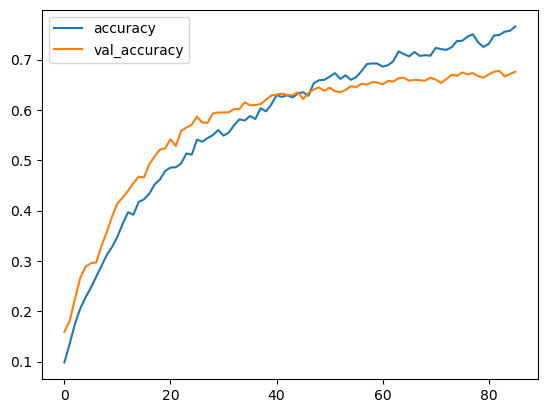

In [13]:
plt.plot(history.history['accuracy'][:-50], label='accuracy')
plt.plot(history.history['val_accuracy'][:-50], label='val_accuracy')
plt.legend()
plt.show()

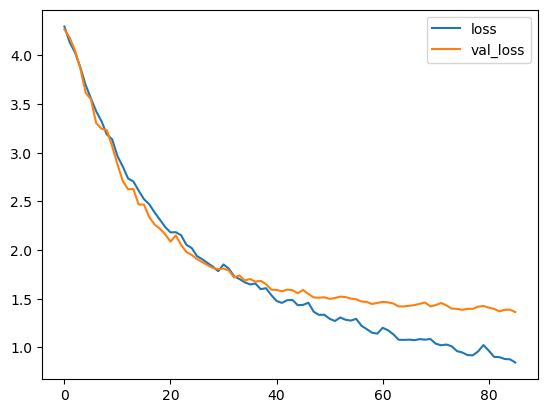

In [14]:
plt.plot(history.history['loss'][:-50], label='loss')
plt.plot(history.history['val_loss'][:-50], label='val_loss')
plt.legend()
plt.show()

In [17]:
# 모델 복원
best_model = load_model('ImagewCNN.h5')
best_model

In [18]:
# 평가
score = best_model.evaluate(X_test, y_test)
print(f'손실률 : {score[0]}')
print(f'정확도 : {score[1]}')

68/68 [==============================] - 1s 10ms/step - loss: 1.3642 - accuracy: 0.6760
손실률 : 1.3641819953918457
정확도 : 0.6760368943214417
